In [1]:
import numpy as np
import pandas as pd
from finsim.portfolio import DynamicPortfolioWithDividends
from matplotlib import pyplot as plt

In [39]:
from plotnine import ggplot, aes, geom_line, theme, element_text, scale_x_datetime, labs
from mizani.breaks import date_breaks

In [19]:
symbols_nbshares = {'VOO':1, 'QQQ': 1}
startdate = '2020-01-01'
enddate = '2023-02-17'

In [20]:
portfolio = DynamicPortfolioWithDividends(symbols_nbshares, startdate)
portfolio.move_cursor_to_date(enddate)

In [21]:
worthdf = portfolio.get_portfolio_values_overtime(startdate, enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
worthdf.head()

,TimeStamp,stock_value,dividend,cash,value
0,2020-01-02,514.580017,0.0,0.0,514.580017
1,2020-01-03,510.419983,0.0,0.0,510.419983
2,2020-01-06,512.910004,0.0,0.0,512.910004
3,2020-01-07,512.059998,0.0,0.0,512.059998
4,2020-01-08,515.209991,0.0,0.0,515.209991


In [44]:
plotdf = pd.concat([
    pd.DataFrame({
    'TimeStamp': worthdf['TimeStamp'], 
    'value': worthdf['stock_value'], 
    'plot': 'stock price'}),
    pd.DataFrame({
        'TimeStamp': worthdf['TimeStamp'],
        'value': worthdf['value'],
        'plot': 'stock price+dividend'
    })
])

In [45]:
plotdf

,TimeStamp,value,plot
0,2020-01-02,514.580017,stock price
1,2020-01-03,510.419983,stock price
2,2020-01-06,512.910004,stock price
3,2020-01-07,512.059998,stock price
4,2020-01-08,515.209991,stock price
...,...,...,...
784,2023-02-13,705.717006,stock price+dividend
785,2023-02-14,707.826991,stock price+dividend
786,2023-02-15,711.447017,stock price+dividend
787,2023-02-16,700.356990,stock price+dividend


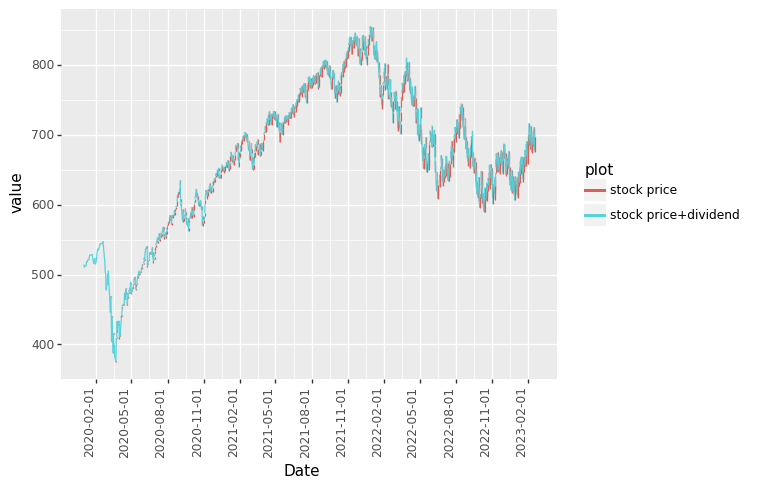

<ggplot: (8760332285386)>

In [50]:
plt = (ggplot(plotdf)
 + geom_line(aes('TimeStamp', 'value', color='plot', group=1))
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + scale_x_datetime(breaks=date_breaks('3 months'))
 + labs(x='Date', y='value')
)
plt

In [51]:
plt.save('plot.png')

/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plot.png
